In [1]:
#  *** INITIAL SETUP *******************************

# Standard imports:
import numpy as np
import pandas as pd
import os

# ASE imports:
import ase
from ase.io.trajectory import Trajectory

# NequIP imports:
import nequip
from nequip.ase import NequIPCalculator

# imports from Auxiliary file:
from Model_Evaluator_auxiliary import extract_all_data

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn-notebook
#seaborn-whitegrid
#plt.style.use('seaborn-notebook')
#sns.set_style("ticks")
#sns.set_context("talk")

font = {'size'   : 15}
matplotlib.rc('font', **font)

# ***************************************************

In [2]:
P6 = pd.read_csv('Evaluated_Models/P-r6.csv')
TD = pd.read_csv('Evaluated_Models/ME_test_data.csv')

/home/modules/software/IPython/7.18.1-GCCcore-10.2.0/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
P6

,f_x,f_y,f_z,|f|,pos_x,pos_y,pos_z,species,atoms_label,E,N,diff_f_x,diff_f_y,diff_f_z,diff_|f|,diff_E,metadata
0,-0.283419,-0.041353,-0.053154,0.291311,7.046184,7.267680,13.134041,Au,0.0,-565.469116,201.0,0.009734,0.020570,-0.000292,0.022758,-0.091208,test
1,0.101745,-0.030284,-0.032409,0.110993,5.025712,11.148264,11.182424,Au,0.0,-565.469116,201.0,0.005780,0.006928,-0.018624,0.020694,-0.091208,NaN
2,-0.286981,0.077964,0.525773,0.604048,6.894259,8.953831,10.785871,Au,0.0,-565.469116,201.0,0.026522,-0.011802,-0.005026,0.029461,-0.091208,NaN
3,0.084846,0.157369,0.224801,0.287227,6.818779,10.927123,8.783450,Au,0.0,-565.469116,201.0,-0.006051,-0.008503,-0.006489,0.012289,-0.091208,NaN
4,-0.025914,-0.147989,-0.026783,0.152610,4.985017,9.196157,13.199258,Au,0.0,-565.469116,201.0,0.003708,0.003178,0.002394,0.005439,-0.091208,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245934,-0.038284,-0.055691,0.148604,0.163249,25.437583,17.225795,21.314053,Au,999.0,-781.350464,279.0,0.000534,-0.003328,-0.002377,0.004125,1.715989,NaN
245935,-0.660028,-0.100530,0.012859,0.667764,25.410150,21.317052,13.185667,Au,999.0,-781.350464,279.0,0.000998,0.019478,-0.000734,0.019517,1.715989,NaN
245936,0.262614,-0.115514,0.195653,0.347260,25.409794,21.322104,17.228774,Au,999.0,-781.350464,279.0,0.012735,-0.000324,-0.001587,0.012838,1.715989,NaN
245937,-0.414313,0.032564,0.060084,0.419912,25.371871,21.322252,21.322025,Au,999.0,-781.350464,279.0,0.005504,0.010869,-0.001828,0.012319,1.715989,NaN


In [4]:
RE = 100*P6['diff_|f|'].values/TD['|f|'].values

<ipython-input-4-40a169641da5>:1: RuntimeWarning: invalid value encountered in true_divide
  RE = 100*P6['diff_|f|'].values/TD['|f|'].values


In [35]:
all_data = Trajectory("/home/niflheim/s173973/treeweek/test1/updated_ts.traj")
num_training = 2406

training_data = all_data[:num_training]

training = extract_all_data(training_data)

In [36]:
training

,f_x,f_y,f_z,|f|,pos_x,pos_y,pos_z,species,atoms_label,E,N
0,-1.325880,0.025620,1.127340,1.740549,8.321306,1.882148,8.851379,Ti,0.0,-2315.928675,288.0
1,-0.895180,-0.189960,0.277270,0.956196,-0.263547,-0.032995,8.095468,Ti,0.0,-2315.928675,288.0
2,0.177000,-2.332150,1.946500,3.042879,3.088250,0.060124,8.856446,Ti,0.0,-2315.928675,288.0
3,0.034550,1.570780,1.107770,1.922420,5.059063,1.749243,7.971063,Ti,0.0,-2315.928675,288.0
4,-0.042050,-0.253110,-0.823540,0.862584,6.301482,1.881793,9.264134,O,0.0,-2315.928675,288.0
...,...,...,...,...,...,...,...,...,...,...,...
595741,0.077310,0.153291,-0.096786,0.197085,15.924849,15.298573,11.010289,Au,2405.0,-392.699624,147.0
595742,0.518359,0.034236,-0.222906,0.565292,15.518180,17.193050,13.111073,Au,2405.0,-392.699624,147.0
595743,-0.171214,0.409312,-0.221172,0.495749,17.895099,14.118361,12.800850,Au,2405.0,-392.699624,147.0
595744,-0.656830,-0.294422,0.260795,0.765587,16.820581,17.863719,10.527940,Au,2405.0,-392.699624,147.0


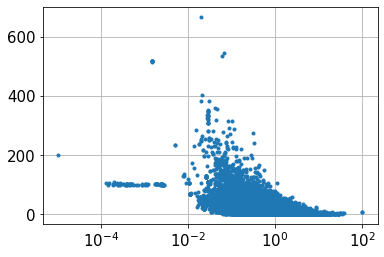

In [5]:
#P6_subset = P6.sort_values(by=['|f|'])
#P6_subset

plt.plot(TD['|f|'].values, RE, '.')

plt.grid()

plt.xscale('log')
#plt.yscale('log')

(0.0, 30.0)

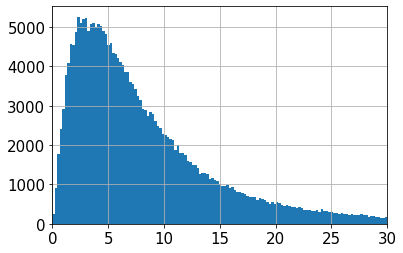

In [6]:
P6_subset = P6.sort_values(by=['|f|'])
P6_subset

plt.hist( RE, 3000)#, log = True )

plt.grid()
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([0,30])

Text(0.5, 0, 'Error on force [eV/Å]')

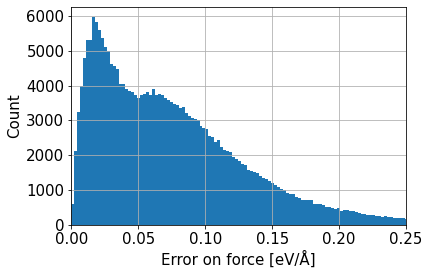

In [53]:
plt.hist(P6['diff_|f|'], 3000)#, log = True )

plt.grid()
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([0,0.25])

plt.ylabel('Count');
plt.xlabel('Error on force [eV/Å]')

In [8]:


bins = np.logspace(-6,3,50)

f = TD['|f|']

model = P6['diff_|f|']

model_xval = np.array([])
model_avg = np.array([])
model_sd = np.array([])

model_data = []

alpha = 0.05

model_max = np.array([])
model_high = np.array([])
model_median = np.array([])
model_low = np.array([])
model_min = np.array([])
model_upper_q = np.array([])


for i in range(len(bins)):
    
    current_index = f[f < bins[i]].index
    f = f.drop(index = current_index)
    
    current_f = model[current_index].values
    
    if(len(current_index) != 0):
        
        if(i == 0):    
            model_xval = bins[i]/2
        else:
            model_xval = np.append(model_xval, (bins[i-1] + bins[i])/2)
        
        data = np.array([current_f])
        
        model_avg = np.append(model_avg, np.mean(data))
        model_sd = np.append(model_sd, np.std(data))
        
        
        model_max = np.append(model_max, np.max(data))
        model_high = np.append(model_high, np.quantile(data, 1-alpha/2))
        model_median = np.append(model_median, np.quantile(data, 0.5))
        model_low = np.append(model_low, np.quantile(data, alpha/2))
        model_min = np.append(model_min, np.min(data))
        
        model_upper_q = np.append(model_upper_q, np.quantile(data, 1-alpha/4))
        
        
        
        model_data.append(data)


Text(0.5, 0, 'Force [eV/Å]')

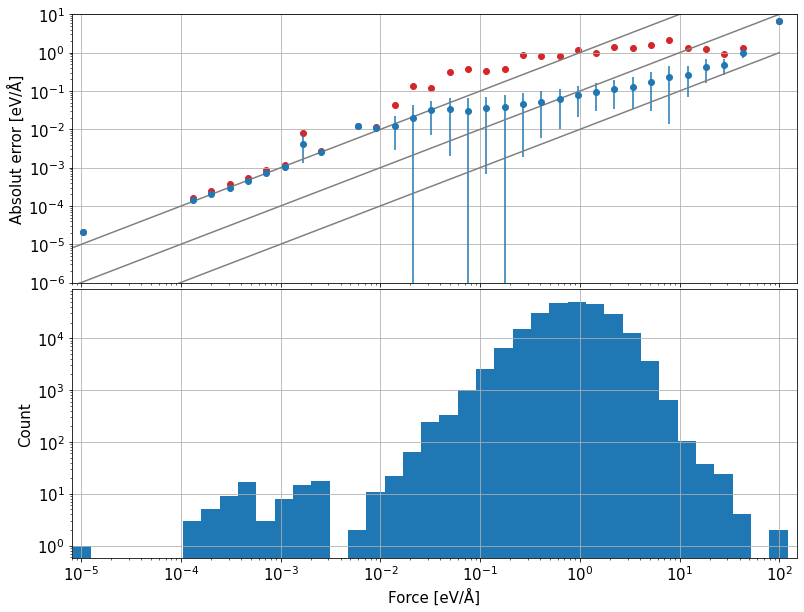

In [54]:
fig, (ax0, ax1) = plt.subplots(2, sharex=True, figsize=(13, 10))

#ax0.scatter(model_xval, model_avg, label = 'Average')

ax0.errorbar(model_xval, model_avg, yerr = model_sd, fmt = 'o',
             label ='Average')

ax0.scatter(model_xval, model_max, label = 'Max', color = 'tab:red')

#ax0.set_xscale('log')
ax0.set_yscale('log')

X10 = np.linspace(-10**-6,100,100)
ax0.plot(X10,X10/100, color = 'gray')
ax0.plot(X10,X10/10, color = 'gray')
ax0.plot(X10,X10/1, color = 'gray')


#ax0.set_xlabel('rmax [Å]')
#ax0.set_ylabel('Force (RMSE or Diffrence) [eV/Å]');
ax0.grid()

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.hist(TD['|f|'].values, bins)
ax1.grid()

ax1.set_xlim([8*10**-6,150])

ax0.set_ylim([10**-6,10])


plt.subplots_adjust(hspace=0.025)

ax0.set_ylabel('Absolut error [eV/Å]')
ax1.set_ylabel('Count');
ax1.set_xlabel('Force [eV/Å]')



Text(0.5, 0, 'Force [eV/Å]')

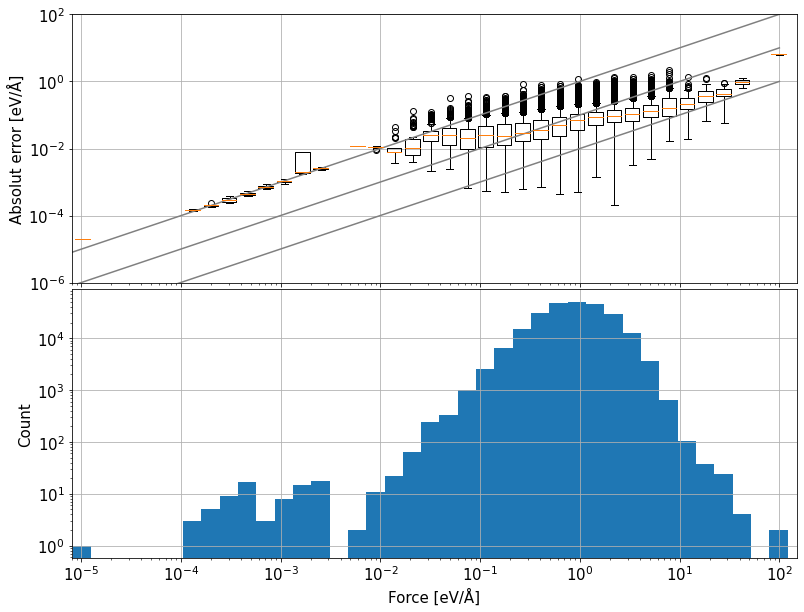

In [55]:


fig, (ax0, ax1) = plt.subplots(2, sharex=True, figsize=(13, 10))

#ax0.scatter(model_xval, model_avg, label = 'Average')

for i in range(len(model_data)):
    
    x = model_xval[i]
    
    y = ax0.boxplot(model_data[i][0], positions = [x], widths = x/3)

#ax0.set_xscale('log')
ax0.set_yscale('log')

X10 = np.linspace(-10**-6,100,100)
ax0.plot(X10,X10/100, color = 'gray')
ax0.plot(X10,X10/10, color = 'gray')
ax0.plot(X10,X10/1, color = 'gray')


#ax0.set_xlabel('rmax [Å]')
#ax0.set_ylabel('Force (RMSE or Diffrence) [eV/Å]');
ax0.grid()

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.hist(TD['|f|'].values, bins)
ax1.grid()

ax1.set_xlim([8*10**-6,150])

ax0.set_ylim([10**-6,100])


plt.subplots_adjust(hspace=0.025)

ax0.set_ylabel('Absolut error [eV/Å]')
ax1.set_ylabel('Count');
ax1.set_xlabel('Force [eV/Å]')



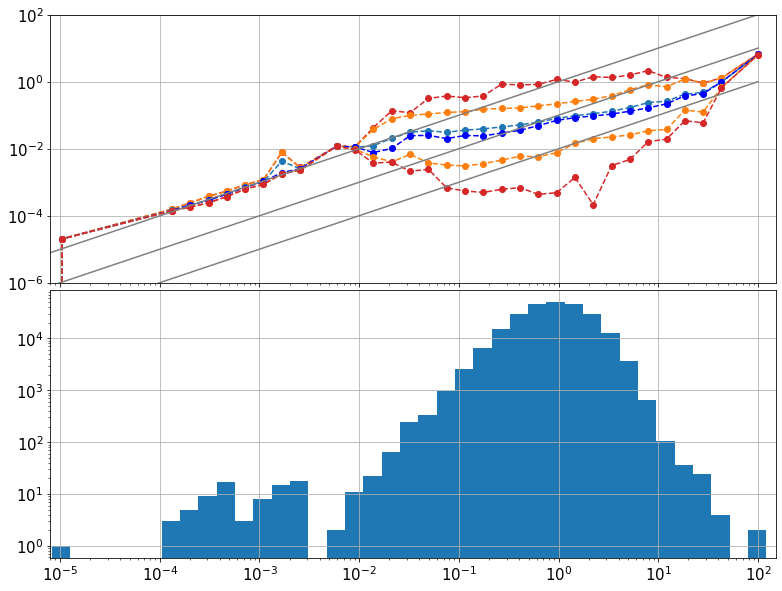

In [11]:


fig, (ax0, ax1) = plt.subplots(2, sharex=True, figsize=(13, 10))

#ax0.scatter(model_xval, model_avg, label = 'Average')

ax0.plot(model_xval, model_max,'--o', color = 'tab:red')
ax0.plot(model_xval, model_high,'--o', color = 'tab:orange')
ax0.plot(model_xval, model_avg,'--o', color = 'tab:blue')
ax0.plot(model_xval, model_median,'--o', color = 'blue')
ax0.plot(model_xval, model_low, '--o', color = 'tab:orange')
ax0.plot(model_xval, model_min,'--o', color = 'tab:red')


#ax0.set_xscale('log')
ax0.set_yscale('log')

X10 = np.linspace(-10**-6,100,100)
ax0.plot(X10,X10/100, color = 'gray')
ax0.plot(X10,X10/10, color = 'gray')
ax0.plot(X10,X10/1, color = 'gray')


#ax0.set_xlabel('rmax [Å]')
#ax0.set_ylabel('Force (RMSE or Diffrence) [eV/Å]');
ax0.grid()

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.hist(TD['|f|'].values, bins)
ax1.grid()

ax1.set_xlim([8*10**-6,150])

ax0.set_ylim([10**-6,100])


plt.subplots_adjust(hspace=0.025)


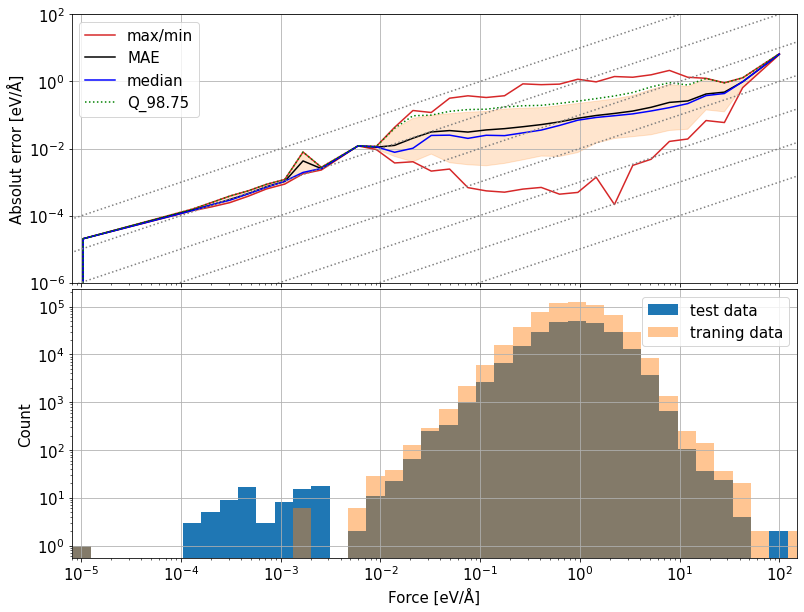

In [52]:
fig, (ax0, ax1) = plt.subplots(2, sharex=True, figsize=(13, 10))

#ax0.scatter(model_xval, model_avg, label = 'Average')



ax0.fill_between(model_xval, model_high, model_low, color = 'tab:orange', alpha = 0.2)

ax0.plot(model_xval, model_max,'-', color = 'tab:red')
ax0.plot(model_xval, model_min,'-', color = 'tab:red', label = 'max/min')


ax0.plot(model_xval, model_avg,'-', color = 'black', label = 'MAE')
ax0.plot(model_xval, model_median,'-', color = 'blue', label = 'median')

ax0.plot(model_xval, model_upper_q,':', color = 'g', label = 'Q_98.75')



#ax0.set_xscale('log')
ax0.set_yscale('log')

X10 = np.linspace(-10**-6,1000,100)
ax0.plot(X10,X10/100000, ':', color = 'gray')
ax0.plot(X10,X10/10000, ':', color = 'gray')
ax0.plot(X10,X10/1000, ':', color = 'gray')
ax0.plot(X10,X10/100, ':', color = 'gray')
ax0.plot(X10,X10/10, ':', color = 'gray')
ax0.plot(X10,X10/1, ':', color = 'gray')
ax0.plot(X10,X10*10, ':', color = 'gray')

ax0.legend()


#ax0.set_xlabel('rmax [Å]')
#ax0.set_ylabel('Force (RMSE or Diffrence) [eV/Å]');
ax0.grid()

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.hist(TD['|f|'].values, bins, label = 'test data')
ax1.hist(training['|f|'].values, bins, alpha = 0.45, label = 'traning data')
ax1.grid()

ax1.set_xlim([8*10**-6,150])
ax0.set_ylim([10**-6,100])


plt.subplots_adjust(hspace=0.025)

ax0.set_ylabel('Absolut error [eV/Å]')
ax1.set_ylabel('Count');
ax1.set_xlabel('Force [eV/Å]')

ax1.legend()

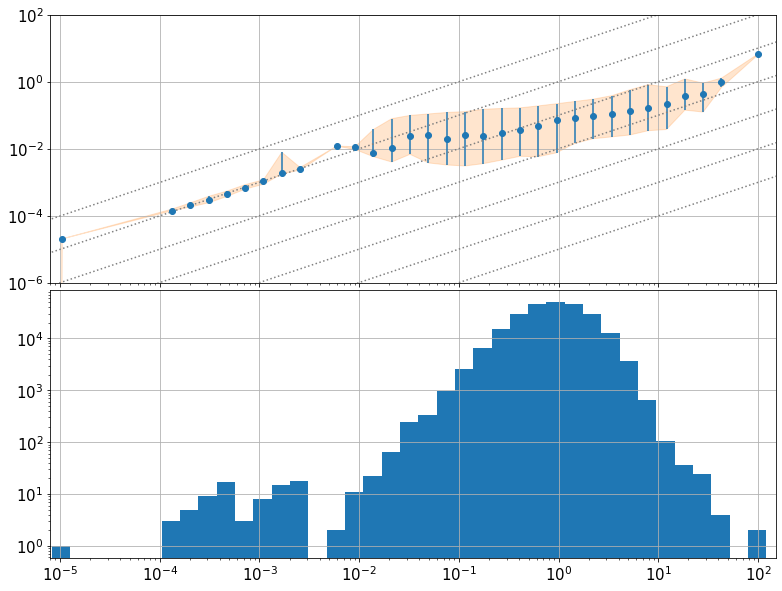

In [13]:
fig, (ax0, ax1) = plt.subplots(2, sharex=True, figsize=(13, 10))

#ax0.scatter(model_xval, model_avg, label = 'Average')




ax0.fill_between(model_xval, model_high, model_low, color = 'tab:orange', alpha = 0.2)
ax0.errorbar(model_xval, model_median, fmt = 'o',
             yerr = [model_median - model_low, model_high - model_median])


#ax0.set_xscale('log')
ax0.set_yscale('log')

X10 = np.linspace(-10**-6,1000,100)
ax0.plot(X10,X10/100000, ':', color = 'gray')
ax0.plot(X10,X10/10000, ':', color = 'gray')
ax0.plot(X10,X10/1000, ':', color = 'gray')
ax0.plot(X10,X10/100, ':', color = 'gray')
ax0.plot(X10,X10/10, ':', color = 'gray')
ax0.plot(X10,X10/1, ':', color = 'gray')
ax0.plot(X10,X10*10, ':', color = 'gray')


#ax0.set_xlabel('rmax [Å]')
#ax0.set_ylabel('Force (RMSE or Diffrence) [eV/Å]');
ax0.grid()

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.hist(TD['|f|'].values, bins)
ax1.grid()

ax1.set_xlim([8*10**-6,150])

ax0.set_ylim([10**-6,100])


plt.subplots_adjust(hspace=0.025)

In [14]:
DATA = Trajectory('/home/niflheim/s173973/treeweek/test1/updated_ts.traj') 

treaning_data = D[:2861]
test_data = D[-1000:]

treaning_data = extract_all_data(treaning_data)
print('p1 done')

test_data = extract_all_data(test_data)
print('p2 done')


NameError: name 'D' is not defined

In [ ]:
test_data

In [ ]:
def fitLinear(training_data, test_data):
    
    # Determening number of uniqe types of atoms:
    species = pd.unique(training_data['species'])
    
    F = pd.DataFrame(
                      np.zeros((len(species), 3)),
                      index=pd.Index(['f_x','f_y','f_z']),
                      columns=pd.Index(species)
                    )
    
    for spe in species:
        
        sub_data = training_data[training_data['species'] == spe]

        f_x = sub_data['f_x'].values 
        f_y = sub_data['f_x'].values
        f_z = sub_data['f_x'].values
    
        F[spe]['f_x'] = np.mean(f_x)
        F[spe]['f_y'] = np.mean(f_x)
        F[spe]['f_z'] = np.mean(f_x)
        
    f_x_test = test_data['f_x'].values
    f_y_test
    
    return F



In [ ]:
fitLinear(d)